<font color=#00008b size=5 face="黑體">**載入基本 package**</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import sklearn

<font color=#00008b size=5 face="黑體">**資料讀取. 探索. 處理**</font>

### 資料二 | [ARCENE](https://archive.ics.uci.edu/ml/machine-learning-databases/arcene/)
**變數解釋**  
  10000個數值特徵
  
**預測變數**  
label (pos: 1 , neg: -1)  

In [2]:
ARCENE_df_1 = pd.read_csv('.\\data\\2.ARCENE\\arcene_train.data', sep=' ', header=None)
ARCENE_df_2 = pd.read_csv('.\\data\\2.ARCENE\\arcene_valid.data', sep=' ', header=None)
ARCENE_label_1 = pd.read_csv('.\\data\\2.ARCENE\\arcene_train.labels', sep=' ', header=None)
ARCENE_label_2 = pd.read_csv('.\\data\\2.ARCENE\\arcene_valid.labels', sep=' ', header=None)
#print('x_train:', ARCENE_df_1.shape, ',   y_train:', ARCENE_label_1.shape)
#print('x_valid:', ARCENE_df_2.shape, ',   y_valid:', ARCENE_label_2.shape)
ARCENE_X_df = pd.concat([ARCENE_df_1, ARCENE_df_2]).loc[:, :10000-1].reset_index(drop=True)
ARCENE_y_df = pd.concat([ARCENE_label_1, ARCENE_label_2]).reset_index(drop=True)
print('X:', ARCENE_X_df.shape, ',    y:', ARCENE_y_df.shape)
ARCENE_X_df.head(3)

X: (200, 10000) ,    y: (200, 1)


,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,71,0,95,0,538,404,20,0,0,...,255,570,86,0,36,0,80,0,0,524
1,0,41,82,165,60,554,379,0,71,0,...,213,605,69,7,473,0,57,0,284,423
2,0,0,1,40,0,451,402,0,0,0,...,235,593,28,0,24,0,90,0,34,508


In [60]:
# split data by the label
ARCENE_pos = ARCENE_X_df[ARCENE_y_df[0] == 1]
ARCENE_neg = ARCENE_X_df[ARCENE_y_df[0] == -1]

In [61]:
ARCENE_pos

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,71,0,95,0,538,404,20,0,0,...,255,570,86,0,36,0,80,0,0,524
2,0,0,1,40,0,451,402,0,0,0,...,235,593,28,0,24,0,90,0,34,508
3,0,56,44,275,14,511,470,0,0,0,...,91,600,0,26,86,0,102,0,0,469
6,76,80,236,213,0,324,361,21,0,0,...,840,2,82,0,0,247,401,0,17,412
11,17,26,0,299,0,501,0,0,17,144,...,207,409,0,33,0,323,238,0,0,331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0,55,0,472,0,370,419,0,26,13,...,131,568,0,0,483,0,78,0,285,494
192,14,38,31,331,0,497,451,0,72,10,...,200,595,0,0,561,0,51,0,43,418
193,57,78,133,336,0,248,457,0,0,0,...,789,0,60,0,0,210,321,0,0,396
197,93,32,137,319,0,264,231,21,0,0,...,929,9,0,0,0,244,309,0,276,312


In [5]:
# 資料基本描述
def data_explore(df):
    print("*Missing values :  ", df.isnull().sum().values.sum())
    print("*duplicate values :  ", df.duplicated().sum(), sep='')
    print("*min of Unique values : ", sorted(df.nunique())[:10])
    print("*max of Unique values : ", sorted(df.nunique())[9999-10:])
    print("*Unique values & feature type : ")
    display(pd.DataFrame({'unique values':df.nunique(), 'feature type':df.dtypes}))
    
data_explore(ARCENE_X_df)

*Missing values :   0
*duplicate values :  0
*min of Unique values :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
*max of Unique values :  [177, 177, 177, 178, 179, 179, 180, 180, 181, 182, 182]
*Unique values & feature type : 


,unique values,feature type
0,82,int64
1,86,int64
2,98,int64
3,168,int64
4,63,int64
...,...,...
9995,117,int64
9996,158,int64
9997,10,int64
9998,108,int64


In [9]:
ARCENE_pos.describe(percentiles =[.25, .50, .75])

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,41.477273,36.284091,75.590909,315.727273,4.931818,399.590909,286.534091,6.568182,31.818182,27.795455,...,425.738636,349.022727,42.943182,9.318182,82.306818,172.022727,224.852273,0.545455,82.522727,393.136364
std,49.016530,41.318763,77.906020,156.143003,14.666245,108.525079,178.455052,13.526301,54.322059,53.802354,...,309.203147,266.944567,51.420815,17.230383,126.925117,160.383160,126.477161,2.993898,107.256806,88.043117
min,0.000000,0.000000,0.000000,0.000000,0.000000,187.000000,0.000000,0.000000,0.000000,0.000000,...,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,223.500000,0.000000,288.500000,190.500000,0.000000,0.000000,0.000000,...,181.750000,2.000000,0.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000,340.750000
50%,17.000000,23.500000,48.500000,327.000000,0.000000,426.000000,338.000000,0.000000,0.000000,0.000000,...,264.500000,461.000000,28.000000,0.000000,23.500000,218.500000,225.000000,0.000000,33.000000,375.500000
75%,84.000000,61.000000,157.500000,413.750000,0.000000,493.250000,442.000000,4.500000,41.250000,10.750000,...,805.250000,579.250000,72.000000,9.250000,114.500000,285.000000,345.500000,0.000000,146.000000,470.750000
max,147.000000,218.000000,240.000000,677.000000,99.000000,583.000000,501.000000,55.000000,202.000000,175.000000,...,969.000000,654.000000,200.000000,77.000000,561.000000,509.000000,423.000000,24.000000,390.000000,527.000000


In [10]:
ARCENE_neg.describe(percentiles =[.25, .50, .75])

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,...,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,30.598214,37.660714,48.294643,333.044643,26.580357,419.857143,178.991071,8.580357,62.133929,104.526786,...,337.669643,410.330357,48.669643,25.669643,126.705357,182.464286,184.410714,0.803571,92.241071,336.910714
std,48.228708,35.266183,63.186644,154.673815,30.651378,103.001955,170.250822,15.889618,57.830989,109.063331,...,225.173342,203.651902,46.994803,27.702209,176.466348,127.504031,108.989673,3.643677,114.979767,110.793904
min,0.000000,0.000000,0.000000,7.000000,0.000000,181.000000,0.000000,0.000000,0.000000,0.000000,...,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
25%,0.000000,2.750000,0.000000,208.750000,0.000000,343.500000,0.000000,0.000000,3.250000,0.000000,...,193.000000,336.000000,0.000000,0.000000,13.000000,4.500000,87.750000,0.000000,0.000000,267.750000
50%,10.000000,32.500000,10.500000,345.000000,12.000000,438.500000,129.500000,0.000000,51.000000,85.500000,...,256.500000,457.500000,45.500000,17.000000,58.500000,206.000000,157.500000,0.000000,42.000000,341.500000
75%,33.250000,58.250000,96.250000,448.000000,50.000000,500.500000,342.500000,11.250000,110.250000,161.500000,...,355.250000,570.750000,81.000000,47.000000,136.000000,281.500000,277.000000,0.000000,163.500000,419.750000
max,194.000000,142.000000,207.000000,705.000000,109.000000,635.000000,480.000000,74.000000,196.000000,425.000000,...,856.000000,692.000000,173.000000,90.000000,656.000000,409.000000,422.000000,22.000000,491.000000,533.000000


In [37]:
pos_mean = ARCENE_pos.mean()
neg_mean = ARCENE_neg.mean()
diff = pos_mean - neg_mean
feature_col = [i for i in range(10000) if (abs(diff)[i]>100)]
np.array(feature_col).shape

(263,)

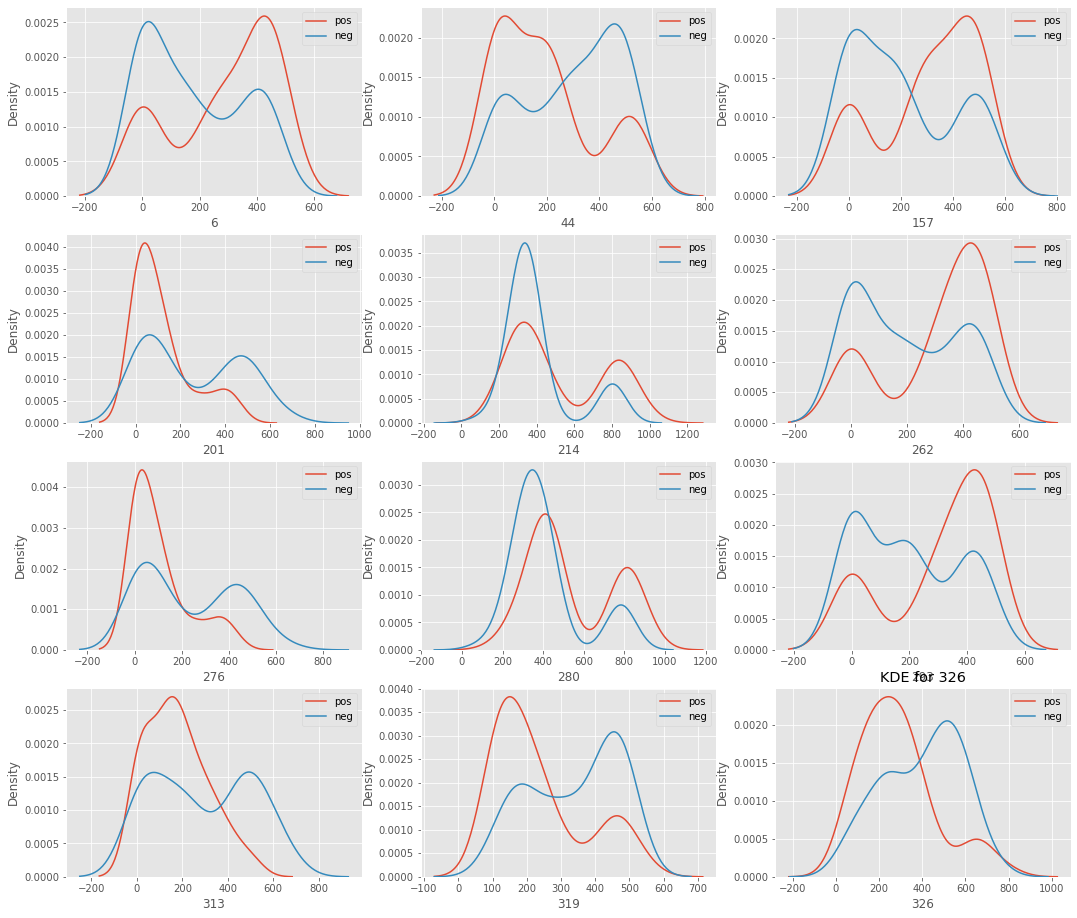

In [56]:
# 全部都是量化資料
# 量化變數繪圖 (KDE plot)
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (18,16))
row, col = 0, 0
for i, feature in enumerate(ARCENE_X_df.columns):
    if i in feature_col[:12]:
        plt.title("KDE for {}".format(feature))
        ax = sns.kdeplot(ARCENE_pos[feature], label='pos', ax=axes[row][col])
        ax = sns.kdeplot(ARCENE_neg[feature], label='neg', ax=axes[row][col])
        ax.legend()
        #plt.show()
        col += 1
        if col==3:
            col = 0
            row += 1

In [63]:
np.var(ARCENE_X_df[feature_col]).describe(percentiles=[.25, .50, .75])

count      263.000000
mean     38902.467645
std      13389.295616
min      16852.029975
25%      29772.538200
50%      36159.620000
75%      46079.394950
max      71788.925600
dtype: float64

In [64]:
# 使用變異數來篩選特徵
from sklearn.feature_selection import VarianceThreshold
ARCENE_X_df = ARCENE_X_df[feature_col]
variance_x = VarianceThreshold(threshold=38910)
variance_x.fit_transform(ARCENE_X_df)


array([[497, 314, 429, ...,   3, 135,  13],
       [527, 265, 398, ..., 118,  48,  69],
       [523, 344, 453, ...,   0,   8,   0],
       ...,
       [255, 926, 897, ..., 121, 145,  81],
       [322, 812, 789, ..., 197, 137,  79],
       [255, 847, 831, ..., 246, 289, 198]], dtype=int64)